## 미션 소개

- 쇼핑몰 리뷰 데이터를 대상으로 감성 분석을 해 보는 미션입니다. 데이터 로드 및 전처리부터 모델 학습과 성능 평가까지 전부 구현하면 됩니다.

- 모델을 학습시킬 때는 Full Fine-Tuning 방식과 PEFT 방식을 모두 활용해 보고 두 방식에 어떤 차이가 있는지 확인해 보세요. 예를 들어 모델을 학습시키는 데 걸리는 시간, 같은 조건으로 학습시켰을 때 감성 분석 정확도, 저장되는 모델 파일의 용량 등을 비교해 볼 수 있습니다.

## 사용 데이터셋

- review-sentiment-analysis.zip

## 데이터셋 업로드 및 압축 해제

In [ ]:
import zipfile
import os

zip_path = "/content/review-sentiment-analysis.zip"
extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## 데이터 형식
- JSON 파일 / JSON 파일 하나에 여러 개의 리뷰 포함
- RaWText : 리뷰 텍스트 , GeneralPolarity : 리뷰에 대한 긍부정 라벨
- GeneralPolarity 값 : -1 -> 부정 , 0 -> 중립 , 1 -> 긍정

## 데이터 구성
- 패션, 화장품, 가전, IT기기, 생활 5가지 분야에 대해 쇼핑몰과 SNS에 달린 리뷰

-> 패션 카테고리를 선택하고 , 모델을 학습시키고 성능 평가

## EDA

## SNS json 파일

In [ ]:
import json

In [ ]:
with open('/content/review-sentiment-analysis/SNS/01. 패션/1-1.여성의류(196).json','r',encoding='utf-8') as f:
    df_sns = json.load(f)

In [ ]:
df_sns[0]

{'Index': '1024338',
 'RawText': '안녕하세요 이웃님들 반갑습니다. 요즘 날씨가 많이 쌀쌀해졌죠? 요즘 계절에 입으면 딱 좋을 인생 경량 패딩 하나 소개해 드릴게요.  다 함께 go go go~~  제가 입어보고 좋아서 엄마께도 구매해드렸네요. 딱 기본 스타일인데 또 입은 거 보면 깔끔하게 저렴해보이지 않는 디자인이라서 어디서 샀냐고 많이들 물어보는 옷입니다.  엄마도 제가 입은 것 보시더니 탐내셔서  주문해드렸어요. 영하로 내려가는 날씨에는 이것만 입기엔 얇지만 초겨울까지는 운동 갈때 안에 얇은 기능성 반팔 입고 요것만 입어도 꽤 따뜻해요. 색상도 디자인도 무난해서 사무실에 두고 입기도 좋고, 평소에 가볍게 나갈때 코디하기도 좋아요. 앞으로 코트를 입거나 할때 안에 내피로 활용하기도 딱일 듯요! 맘같아선 색깔별로 쟁이고 싶습니다.  20대와 50대 모두 아우르는 디자인이 무난하고 깔끔하면서 고급스러운 옷 추천합니다~~~  설명 끝! 좀 도움이 되셨나요? 그러면 좋아요 꾹 눌러 주시고 전 이만 총총총~~ 항상 여러 이웃님들께 감사드립니다. ',
 'Source': 'SNS',
 'Domain': '패션',
 'MainCategory': '여성의류',
 'ProductName': 'OO 경량 다운 자켓',
 'Syllable': '513',
 'Word': '121',
 'GeneralPolarity': '1',
 'Aspects': [{'Aspect': '디자인',
   'SentimentText': '딱 기본 스타일인데 또 입은 거 보면 깔끔하게 저렴해보이지 않는 디자인이라서',
   'SentimentWord': '11',
   'SentimentPolarity': '1'},
  {'Aspect': '두께',
   'SentimentText': '이것만 입기엔 얇지만',
   'SentimentWord': '3',
   'SentimentPolarity': '-1'},
  {'Aspect': '기능',
   'SentimentTex

- Syllable :총 음절 수

SNS JSON 파일 수: 51개
SNS 총 리뷰 수 : 5000


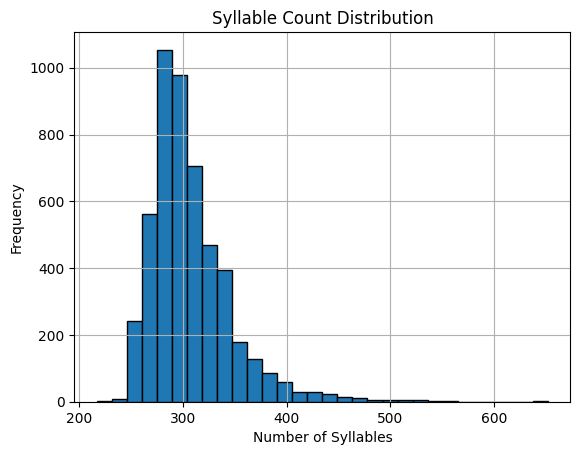

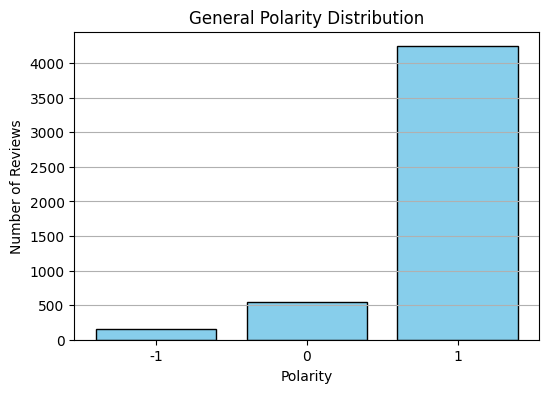

In [ ]:
import os
import json
import matplotlib.pyplot as plt

folder_path = '/content/review-sentiment-analysis/SNS/01. 패션'

json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
print(f"SNS JSON 파일 수: {len(json_files)}개")

total_count = 0
syllables = []
generalpolarities = []

for file_name in json_files:
    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        total_count += len(data)

        for item in data:
            syllable = int(item.get('Syllable', 0))
            syllables.append(syllable)
            generalpolarity = item.get('GeneralPolarity',"-2")
            generalpolarities.append(generalpolarity)


print(f"SNS 총 리뷰 수 : {total_count}")

# 시각화

plt.hist(syllables, bins=30, edgecolor='black')
plt.title('Syllable Count Distribution')
plt.xlabel('Number of Syllables')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

from collections import Counter

# 감정 레이블을 정수로 변환 (-2는 잘못된 값 체크용)
generalpolarities = [int(p) for p in generalpolarities if p in ['-1', '0', '1']]

# 감정별 개수 세기
label_counts = Counter(generalpolarities)

# 정렬된 라벨과 수
labels = sorted(label_counts.keys())         # [-1, 0, 1]
counts = [label_counts[l] for l in labels]   # [개수, 개수, 개수]

# 시각화
plt.figure(figsize=(6, 4))
plt.bar([str(l) for l in labels], counts, color='skyblue', edgecolor='black')
plt.title('General Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

## 쇼핑몰

In [ ]:
with open('/content/review-sentiment-analysis/쇼핑몰/01. 패션/1-1. 여성의류/1-1.여성의류(1).json','r',encoding='utf-8') as f:
    df_shopping = json.load(f)

In [ ]:
df_shopping[0]

{'Index': '7',
 'RawText': '가격이 착하고 디자인이 예쁩니다',
 'Source': '쇼핑몰',
 'Domain': '패션',
 'MainCategory': '여성의류',
 'ProductName': 'OO 플** 베스트 풀코디 3종',
 'ReviewScore': '100',
 'Syllable': '17',
 'Word': '4',
 'RDate': '20210815',
 'GeneralPolarity': '1',
 'Aspects': [{'Aspect': '가격',
   'SentimentText': '가격이 착하고',
   'SentimentWord': '2',
   'SentimentPolarity': '1'},
  {'Aspect': '디자인',
   'SentimentText': '디자인이 예쁩니다',
   'SentimentWord': '2',
   'SentimentPolarity': '1'}]}

SNS 총 JSON 파일 수 : 450
SNS 총 리뷰 수 : 44996


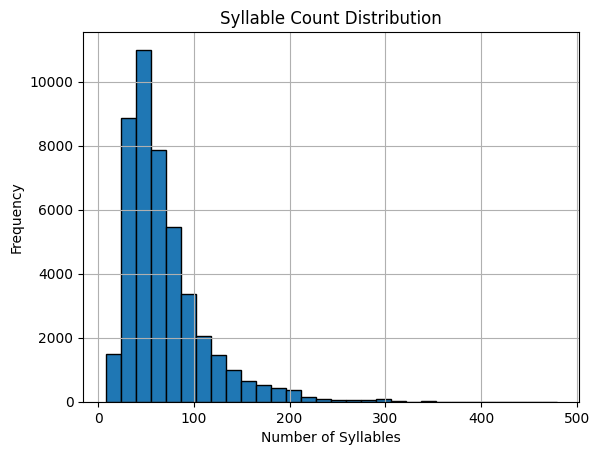

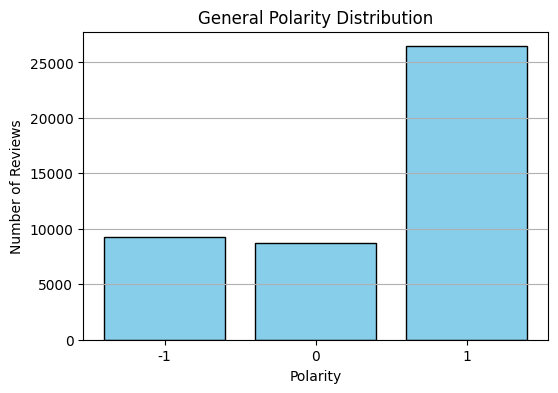

In [ ]:
base_folder = '/content/review-sentiment-analysis/쇼핑몰/01. 패션'

syllables = []
total_review_count = 0
json_file_count = 0

for root, dirs, files in os.walk(base_folder):
    for file_name in files:
        if file_name.endswith('.json'):
            json_file_count +=1
            file_path = os.path.join(root, file_name)

            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)

                total_review_count += len(data)
                for item in data:
                    syllable = int(item.get('Syllable', 0))
                    syllables.append(syllable)
                    generalpolarity = item.get('GeneralPolarity',"-2")
                    generalpolarities.append(generalpolarity)

print(f"SNS 총 JSON 파일 수 : {json_file_count}")
print(f"SNS 총 리뷰 수 : {total_review_count}")

# 시각화

plt.hist(syllables, bins=30, edgecolor='black')
plt.title('Syllable Count Distribution')
plt.xlabel('Number of Syllables')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 감정 레이블을 정수로 변환 (-2는 잘못된 값 체크용)
generalpolarities = [int(p) for p in generalpolarities if p in ['-1', '0', '1']]

# 감정별 개수 세기
label_counts = Counter(generalpolarities)

# 정렬된 라벨과 수
labels = sorted(label_counts.keys())         # [-1, 0, 1]
counts = [label_counts[l] for l in labels]   # [개수, 개수, 개수]

# 시각화
plt.figure(figsize=(6, 4))
plt.bar([str(l) for l in labels], counts, color='skyblue', edgecolor='black')
plt.title('General Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

## 프로젝트 학습 계획

- 쇼핑몰 패션 데이터를 이용해서 Full Fine-Tuning  / PEFT 방식 비교 실험
 - Full Fine-Tuning 방식과 PEFT 방식의 학습 속도
 - 각 방식으로 학습시킨 모델 파일을 저장한 뒤 용량을 비교
 - 리뷰 텍스트의 실제 라벨과 모델이 예측한 결과를 비교하여 감성 분석 모델의 성능을 평가 / 두 가지 학습 방식 사이에 정확도 차이가 있는지 확인

## 실험 1. 쇼핑몰 패션 데이터를 이용해서 Full Fine-Tuning  / PEFT 방식 비교 실험

- 쇼핑몰 / 패션 / 폴더의 모든 json 파일에서 rawtext/generalpolarity를 추출해서 튜플 형식의 fashion_data에 저장

In [ ]:
base_folder = '/content/review-sentiment-analysis/쇼핑몰/01. 패션'

fashion_data = []

for root, dirs , files in os.walk(base_folder):
    for file_name in files:
        if file_name.endswith('.json'):
            file_path = os.path.join(root, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for item in data:
                    rawtext = item.get('RawText', "")
                    generalpolarity = int(item.get('GeneralPolarity',"-2"))
                    fashion_data.append({
                        "text": rawtext,
                        "label": generalpolarity
                    })

In [ ]:
fashion_data[:10]

[{'text': '사이즈가 조금 크게 나온거 같아요. 바지는 입으면 편하고 좋아요. 한치수 작게 주문 해도 좋을듯 합니다.',
  'label': 0},
 {'text': '보이핏이라 엄청 편할것 같아 구입했는데 아이가 넘 불편하고 두꺼워서 많이 덥고 지금 입기에 별로예요~',
  'label': -1},
 {'text': '보이핏이 확실하네요. 루즈핏이라 날씬하게 피팅되는 데님과는 다른분위기. 편안하게입는다생각하고헐렁한 분위기를 즐겨야하네요. 여름철엔  역시 루즈하게  몸을 편하게해주는핏이좋아요.',
  'label': 1},
 {'text': '약간 배기스타일이라고 하는데 허리는 불편하고 허벅지부터종아리부분은 붙는핏이라서 불편하고 별로네요 주부들은 못입어요!!',
  'label': -1},
 {'text': '그 정도 값에 맞는듯해요 사이즈가 너무 넉넉한듯하고 보는 것과는 느낌이 다르네요 ', 'label': -1},
 {'text': '천이 두꺼워서 덥고 원래28입는데 27사이즈 가 적당하네요~  스판도 안 좋아서 바지가 핏도 안 예쁘고 넘 불편해요~^^',
  'label': -1},
 {'text': '사이즈 선택시 정사이즈로 선택하니 넘넘 예쁘네요~~원단도 부드럽고 두께도 적당한것같아요~~핏이예뻐서 딸과함께 입으니 좋아요~~~',
  'label': 1},
 {'text': '바지는 모두 착용감 편해요~^^ 아쉬운 허리가 좀 크네요. 사이즈 교환 없이 그냥  입기로 결정하고 입고 다니는데 좀 헐렁한 허리가 아쉽고..다른 부분이 좋아요. 세탁시 늘어나는 부분도 없어요. 이쁘게 입을께요. 가을에도 좋은 인연이 되기를... ',
  'label': 1},
 {'text': '28인데27시켰어요   잘맞아요 입어보니 편하고  시원하고  좋습니다', 'label': 1},
 {'text': '시원해 보이고 핏도  예쁘다네요. 친구가 주문 부탁해서  주문한것이지만.. 좋다고 하니 저도 기분이 좋네요.',
  'label': 1}]

In [ ]:
len(fashion_data)

44996

## 모델 선정
- 문장 전체를 분류하는 AutoModelForSequenceClassification 사용
- -1 , 0 , 1 -> 3 가지의 감정분류 , SNS 리뷰 라는 특징에 맞는 모델 선정
- 데이터의 특징을 고려해서 beomi/KcBERT-base 모델 선택

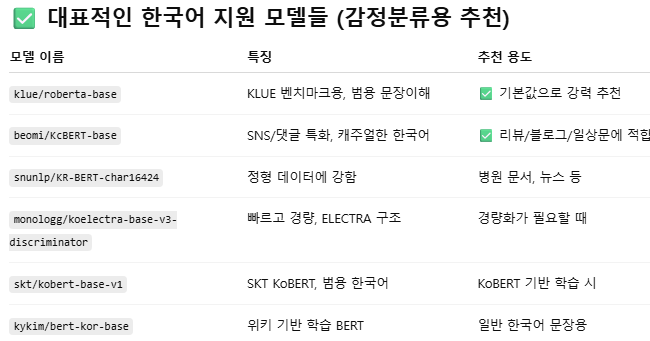

In [ ]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import numpy as np

# 1. 모델용 토크나이저 불러오기

model_id = "beomi/KcBERT-base"

tokenizer = AutoTokenizer.from_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

In [ ]:
# 2. 토큰 길이 측정

token_lengths = [len(tokenizer.encode(item["text"], truncation=False)) for item in fashion_data]

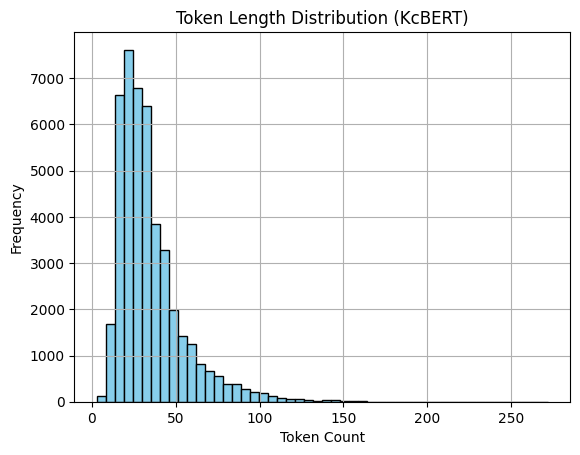

In [ ]:
# 시각화

plt.hist(token_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Token Length Distribution (KcBERT)")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# 4. 통계 요약
min_len = np.min(token_lengths)
max_len = np.max(token_lengths)
mean_len = np.mean(token_lengths)
median_len = np.median(token_lengths)
percentile_95 = np.percentile(token_lengths, 95)

# 보기 좋게 출력
print(" Token Length Statistics")
print(f"{'-'*35}")
print(f"{'Minimum':<20}: {min_len}")
print(f"{'Maximum':<20}: {max_len}")
print(f"{'Mean':<20}: {mean_len:.2f}")
print(f"{'Median':<20}: {median_len}")
print(f"{'95th Percentile':<20}: {percentile_95}")
print(f"{'-'*35}")

 Token Length Statistics
-----------------------------------
Minimum             : 3
Maximum             : 272
Mean                : 34.59
Median              : 29.0
95th Percentile     : 75.0
-----------------------------------


## 전처리
- label에 +1 shift를 적용
- transformers.AutoModelForSequenceClassification은 내부적으로 CrossEntropyLoss를 사용하고, 이 함수는 클래스 인덱스가 0 이상 정수여야만 작동
- max_len을 128로 설정
- 부정 / 보통 / 긍정 별로 8000개씩 데이터 추출 , train = 7500 / val = 500으로 분류
- train_dataset = 부정 7500 + 보통 7500 + 긍정 7500 = 22500
- val_dataset = 부정 500 + 보통 500 + 긍정 500 = 1500

In [ ]:
from datasets import Dataset, concatenate_datasets, DatasetDict
from sklearn.model_selection import train_test_split
import random

# 클래스별로 8000개씩 샘플링
filtered = {label: [] for label in [-1, 0, 1]}
for item in fashion_data:
    if item["label"] in filtered:
        filtered[item["label"]].append(item)

# 샘플링 수 제한 (각 클래스당 8000개)
for label in filtered:
    random.shuffle(filtered[label])
    filtered[label] = filtered[label][:8000]

# 클래스별로 train/val 7500/500 분할
train_data = []
val_data = []

for label in [-1, 0, 1]:
    train_data += filtered[label][:7500]
    val_data += filtered[label][7500:]

# Dataset으로 변환
train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)

# 전처리 함수
def preprocess(example):
    tokenized = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )
    tokenized["labels"] = example["label"] + 1
    return tokenized

# 전처리 적용
tokenized_train = train_dataset.map(preprocess)
tokenized_val = val_dataset.map(preprocess)

# 포맷 설정
tokenized_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
tokenized_val.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

#tokenized_train = tokenized_train.remove_columns(["label"])
#tokenized_val = tokenized_val.remove_columns(["label"])

Map:   0%|          | 0/22500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [ ]:
print(len(tokenized_train))  # 22500
print(len(tokenized_val))    # 1500

22500
1500


In [ ]:
from collections import Counter

# 먼저 format을 리셋 (PyTorch 텐서 상태로는 Counter 사용 불가)
tokenized_train.reset_format()
tokenized_val.reset_format()

# 각 split에 대해 label 분포 확인
train_label_counts = Counter(tokenized_train["labels"])
val_label_counts = Counter(tokenized_val["labels"])

print(" Train 라벨 분포:")
for label in sorted(train_label_counts):
    print(f"Label {label}: {train_label_counts[label]}개")

print("\n Validation 라벨 분포:")
for label in sorted(val_label_counts):
    print(f"Label {label}: {val_label_counts[label]}개")

 Train 라벨 분포:
Label 0: 7500개
Label 1: 7500개
Label 2: 7500개

 Validation 라벨 분포:
Label 0: 500개
Label 1: 500개
Label 2: 500개


In [ ]:
tokenized_train

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 22500
})

## Full Fine-Tuning
- 전체 파라미터 학습

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.9 MB/s eta 0:00:00


### gpu 메모리 사용량 측정
- GPU 메모리 사용량은 PyTorch의 torch.cuda.memory_allocated() API를 사용하여, 학습 시작 전과 학습 종료 후의 할당된 메모리 차이를 기준으로 측정

In [ ]:
#  GPU 사용량 측정 함수
def log_gpu_usage(label=""):
    allocated = torch.cuda.memory_allocated() / 1024**2  # MB 단위로 변환
    reserved = torch.cuda.memory_reserved() / 1024**2
    with open("gpu_usage_ft.txt", "a") as f:
        f.write(f"[{label}] Allocated: {allocated:.2f} MB | Reserved: {reserved:.2f} MB\n")

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import torch


def create_trainer(model, training_args):
    # Hugging Face의 evaluate 라이브러리에서 정확도(accuracy) 지표를불러옴
    accuracy = evaluate.load("accuracy")

    # 모델 평가 함수
    def compute_metrics(eval_pred):
        logits, labels = eval_pred # logits : 마지막 출력층에서 Softmax 또는 Sigmoid를 적용하기 직전의 결과값
        preds = logits.argmax(axis=-1)
        return accuracy.compute(predictions=preds, references=labels) # 예측값과 실제 label을 비교

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_val,
        compute_metrics=compute_metrics,
    )

    return trainer

model_name = "beomi/KcBERT-base"
num_epochs = 4
batch_size = 8

# 모델 학습을 위한 하이퍼파라미터(학습 파라미터) 설정
training_args = TrainingArguments(
    output_dir="./results", # 모델과 체크포인트, 로그 등을 저장할 출력 디렉토리
    eval_strategy="epoch", # 매 epoch이 끝날 때마다 validation set으로 평가
    save_strategy="epoch", # 모델 저장 시점
    save_total_limit=2,  # 최근 N개만 저장
    logging_dir="./logs", # 가장 성능이 좋은 최근 2개만 유지하고, 나머지는 자동 삭제
    logging_steps=50, # 50 step마다 로그 기록
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    load_best_model_at_end=True, # 가장 좋은 성능(아래 metric_for_best_model 기준)의 모델을 마지막에 자동 로드
    metric_for_best_model="accuracy", # 가장 성능이 좋은 모델을 고를 때 사용할 지표 이름
    report_to="none", # 로그를 어디에 보고할지 설정
)

model_ft = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
trainer_ft = create_trainer(model_ft, training_args)

log_gpu_usage("Before Training (Full_fine_tuning)")
trainer_ft.train()
log_gpu_usage("After Training (Full_fine_tuning)")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/KcBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.507300,0.491521,0.828000
2,0.388200,0.443969,0.849333
3,0.239800,0.704462,0.843333
4,0.174400,0.794381,0.843333


In [ ]:
# 모델 구조
model_ft

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30000, 768, padding_idx=0)
      (position_embeddings): Embedding(300, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# 전체 파라미터 수 및 학습 가능한 파라미터 수 출력

def print_trainable_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f" Total parameters: {total:,}")
    print(f" Trainable parameters: {trainable:,}")
    print(f" Trainable ratio: {100 * trainable / total:.2f}%")

print_trainable_parameters(model_ft)

 Total parameters: 108,920,835
 Trainable parameters: 108,920,835
 Trainable ratio: 100.00%


- 1Epoch에 걸리는 학습시간 41:42 / 4 = 10분 26초
- 최고 성능인 2Epoch까지 걸린 시간 : 20분 52초

- Epoch 2에서 최적의 성능 도달
 - Validation Loss: 0.443969
 - Accuracy: 0.849333

- 과적합(overfitting) 징후 발생 (Epoch 3부터)
 - Validation Loss는 Epoch 3에서 급증 (0.4915 → 0.4439 → 0.7044)

- Accuracy는 큰 폭으로 떨어지지 않음
 - Epoch 2: 84.93% → Epoch 4: 84.333%
 - Validation Accuracy는 다소 유지되지만, Loss가 급등한 점은 예측의 신뢰도(confidence)가 낮아졌음을 의미

- gpu 메모리 사용량
 - [Before Training (Full_fine_tuning)] Allocated: 877.26 MB | Reserved: 1124.00 MB
 - [After Training (Full_fine_tuning)] Allocated: 1712.23 MB | Reserved: 2776.00 MB


## 모델 성능 분석: Confusion Matrix 및 예측 사례 검토

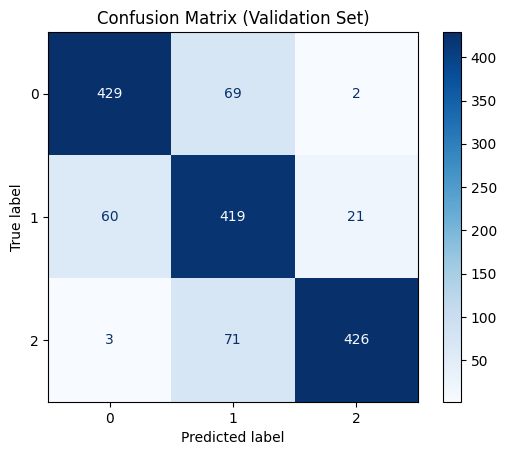


 [맞춘 데이터 예시]
문장: 옷소재가 넘 얇아서 지금입기 추울꺼같아서 아침저녁 운동용으로 입어요. 비추합니다.
정답: 부정, 예측: 부정
-----------------------
문장: 아주 얇아요. 커터앤벅 이라고하기엔 소재가 좀 싼티나는 느낌이 있어요
정답: 부정, 예측: 부정
-----------------------
문장: 38사이즈 였다 살을뺐지만 그래도 넉넉히 입을라고 그냥 38샀는데 흘러내리려해서 벨트를 해야되네요. ㅡㅡ 색상이나 길이 모양 다 맘에 안듦
정답: 부정, 예측: 부정
-----------------------
문장: 착용전 세탁했는데 진청색 오른쪽 옆선이 뒤틀려서 입기 불편해졌습니다
정답: 부정, 예측: 부정
-----------------------
문장: 두벌이왠일? 얼른질렀더니 곤색은 지퍼불량으로 장롱깊은곳으로 박아놈 박스를미쳐 늦게풀러본지라 모르고반품날짜도지나침 디자인도 맘에 안듬
정답: 부정, 예측: 부정
-----------------------

 [틀린 데이터 예시]
문장: 옷감이 뻔들거리는게있지만소매도길어요한단계내려서주문할껄ㅠㅠ
정답: 부정, 예측: 긍정
-----------------------
문장: 남편꺼랑 같이 주문햇는데요. 허리는 크고 바지통은 완죤 넓어서 반품햇어요.  그런데 여자꺼는 짱좋아요~ 남자꺼 사이즈가 아쉽네요~
정답: 부정, 예측: 중립
-----------------------
문장: 초등 4학년 큰딸 입히려고 주문했는데 작아서 2학년 작은딸이 잘 입고있어요..사이즈를 26을 큰딸입혀야 겠네요..길이도  허리도 넘  딱맞아서 한치수  업 해야겠어요.ㅋ
정답: 부정, 예측: 중립
-----------------------
문장: 생각보다  좀 무겁습니다. 사이즈도 좀 크게 나온 느낌이라  고민하다 겨울용이라 그냥 입기로 하긴했지만 평소 자기 사이즈보다 한사이즈 작게해도 무난하긴 할거 같네요.
정답: 부정, 예측: 중립
-----------------------
문장: 가죽 부들부들한데 신은 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

# 1. 원본 텍스트 리스트
val_texts = tokenized_val["text"]

# 2. 예측
predictions = trainer_ft.predict(tokenized_val)
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(axis=1)

# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# 4. 맞춘/틀린 인덱스
correct_indices = (y_true == y_pred)
wrong_indices = (y_true != y_pred)

# 5. 클래스 이름 매핑 (필요시 수정)
label_map = {0: "부정", 1: "중립", 2: "긍정"}

# 6. 맞춘 예시 출력
print("\n [맞춘 데이터 예시]")
for i in torch.where(torch.tensor(correct_indices))[0][:5]:
    print(f"문장: {val_texts[i]}")
    print(f"정답: {label_map[y_true[i]]}, 예측: {label_map[y_pred[i]]}")
    print("-----------------------")

# 7. 틀린 예시 출력
print("\n [틀린 데이터 예시]")
for i in torch.where(torch.tensor(wrong_indices))[0][:5]:
    print(f"문장: {val_texts[i]}")
    print(f"정답: {label_map[y_true[i]]}, 예측: {label_map[y_pred[i]]}")
    print("-----------------------")

- 클래스 1 관련 오분류가 많이 발생
 - 클래스 1이 다른 클래스로 오분류된 경우(False Negatives) : 0으로 61건 / 2로 21건 , 총 오분류 81건
 - 다른 클래스가 1로 오분류된 경우 (False Positives) : 실제 클래스 0인데 클래스 1로 예측: 69건 / 실제 클래스 2인데 클래스 1로 예측: 71건 , 총 오분류 140건

- Precision / Recall (클래스 1 기준)
 - Precision = TP / (TP + FP) = 419 / (419 + 140) = 419 / 559 ≈ 74.95%

 - Recall = TP / (TP + FN) = 419 / (419 + 81) = 419 / 500 = 83.8%

## PEFT (Parameter-Efficient Fine-Tuning)
- 대표적인 PEFT 기법
 - Adapter : Layer 사이에 작은 FFN block 삽입
 - LoRA : 기존 weight에 low-rank 행렬 추가
 - QLoRA : LoRA + 양자화(4bit)로 GPU 효율 ↑
 - Prefix-Tuning : Transformer에 가짜 prefix token만 학습
 - BitFit :	bias 값만 학습

 -> LoRA / QLoRA 방식을 사용해서 성능 비교

## LoRA
- LoRA(Low-Rank Adaptation)는 사전학습된 모델의 weight 행렬에 저차원(low-rank) 행렬을 추가하여 파라미터 효율적인 학습을 가능하게 하는 방식
- 기존 가중치는 **고정(freeze)**하고, LoRA가 삽입한 추가 행렬만 학습
- 흐름
 - transformers 모델 로딩
 - peft 라이브러리로 LoRAConfig 설정
 - get_peft_model()로 base model에 LoRA 삽입
 - 기존 Trainer 코드 그대로 사용

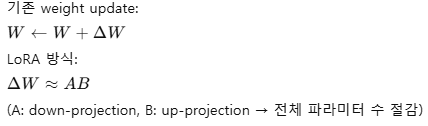

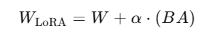

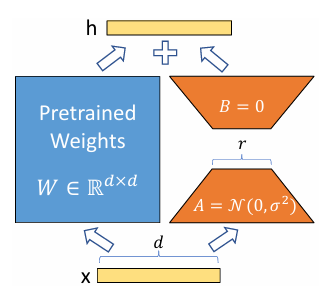

In [ ]:
!pip install -U peft accelerate evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# 모델 로딩

from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_id = "beomi/KcBERT-base"
tokenizer = AutoTokenizer.from_pretrained(model_id)

# 사전학습된 BERT 기반 분류 모델 로딩 (num_labels: 분류 클래스 수)
base_model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=3)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/KcBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# peft 라이브러리로 LoRA 설정

from peft import LoraConfig, get_peft_model, TaskType

# LoRA 설정 정의
lora_config = LoraConfig(
    r=32,                       # Low-rank 차원 , weight 행렬을 16차원 저차원 공간으로 분해해서 학습
    lora_alpha=32,              # 스케일링 계수 ,"학습된 저차행렬을 얼마나 반영할지를 조절하는 스케일 계수
                                # 실제 weight에 (alpha / r) 스케일이 적용
                                # 실제로는 LoRA가 학습한 값에 2배를 곱해서 기존 weight에 더해줌
    target_modules=["query", "value" ],  # LoRA를 적용할 Linear layer 이름
    lora_dropout=0.1,           # Dropout 비율
    bias="none",                # bias 학습 여부
    task_type=TaskType.SEQ_CLS  # 시퀀스 분류 태스크
)

# base 모델에 LoRA 적용
model_lora = get_peft_model(base_model, lora_config)

# 학습 가능한 파라미터 확인
model_lora.print_trainable_parameters()

trainable params: 1,181,955 || all params: 110,102,790 || trainable%: 1.0735


/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:190: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
# TrainingArguments 설정

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results_lora",
    num_train_epochs=8,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch", # Changed from evaluation_strategy
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_dir="./logs_lora",
    logging_steps=50,
    report_to="none",
)

In [ ]:
# compute_metrics 함수 & Trainer 구성

from transformers import Trainer
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return accuracy.compute(predictions=preds, references=labels)

trainer_lora = Trainer(
    model=model_lora,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
#  GPU 사용량 측정 함수
def log_gpu_usage(label=""):
    allocated = torch.cuda.memory_allocated() / 1024**2  # MB 단위로 변환
    reserved = torch.cuda.memory_reserved() / 1024**2
    with open("gpu_usage_log_lora.txt", "a") as f:
        f.write(f"[{label}] Allocated: {allocated:.2f} MB | Reserved: {reserved:.2f} MB\n")

In [ ]:
for name, param in model_lora.named_parameters():
    grad_status = " trainable" if param.requires_grad else " frozen"
    lora_marker = "[LoRA]" if "lora_" in name else ""
    print(f"{name:<80} {grad_status} {lora_marker}")

base_model.model.bert.embeddings.word_embeddings.weight                           frozen 
base_model.model.bert.embeddings.position_embeddings.weight                       frozen 
base_model.model.bert.embeddings.token_type_embeddings.weight                     frozen 
base_model.model.bert.embeddings.LayerNorm.weight                                 frozen 
base_model.model.bert.embeddings.LayerNorm.bias                                   frozen 
base_model.model.bert.encoder.layer.0.attention.self.query.base_layer.weight      frozen 
base_model.model.bert.encoder.layer.0.attention.self.query.base_layer.bias        frozen 
base_model.model.bert.encoder.layer.0.attention.self.query.lora_A.default.weight  trainable [LoRA]
base_model.model.bert.encoder.layer.0.attention.self.query.lora_B.default.weight  trainable [LoRA]
base_model.model.bert.encoder.layer.0.attention.self.key.weight                   frozen 
base_model.model.bert.encoder.layer.0.attention.self.key.bias                     

In [ ]:
log_gpu_usage("Before Training (LoRA)")
trainer_lora.train()
log_gpu_usage("After Training (LoRA)")

Epoch,Training Loss,Validation Loss,Accuracy
1,0.490700,0.442573,0.818000
2,0.449000,0.406182,0.838000
3,0.349100,0.409374,0.838667
4,0.435500,0.405663,0.839333
5,0.413900,0.398102,0.844667
6,0.399400,0.392640,0.849333
7,0.374900,0.395725,0.852667
8,0.408200,0.393673,0.854667


- 1Epoch에 걸리는 학습시간 49:31 / 8 = 6 분 11초
- 최고 성능인 8 Epoch까지 걸린 시간 : 49:31 초
- 전체적인 성능 향상
 - 학습이 진행될수록 Training Loss와 Validation Loss 모두 점진적으로 감소함.

- Accuracy의 지속적인 상승
 - Accuracy는 1에폭의 0.818 에서 시작해 8에폭에서 0.854667까지 상승.
 - 꾸준한 성능 개선이 이루어졌음을 보여줌.

- 과적합(overfitting) 없이 안정적인 학습

- gpu 메모리 사용량
 - [Before Training (LoRA)] Allocated: 420.12 MB | Reserved: 480.00 MB
 - [After Training (LoRA)] Allocated: 446.02 MB | Reserved: 1036.00 MB

- LoRA의 효과

 - 적은 학습 파라미터만 업데이트했음에도 성능 저하 없이 Full Fine-Tuning을 능가하는 능력을 보여줌

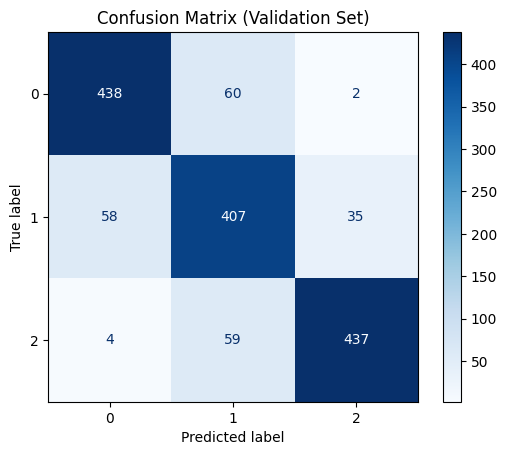


 [맞춘 데이터 예시]
문장: 옷소재가 넘 얇아서 지금입기 추울꺼같아서 아침저녁 운동용으로 입어요. 비추합니다.
정답: 부정, 예측: 부정
-----------------------
문장: 옷감이 뻔들거리는게있지만소매도길어요한단계내려서주문할껄ㅠㅠ
정답: 부정, 예측: 부정
-----------------------
문장: 아주 얇아요. 커터앤벅 이라고하기엔 소재가 좀 싼티나는 느낌이 있어요
정답: 부정, 예측: 부정
-----------------------
문장: 38사이즈 였다 살을뺐지만 그래도 넉넉히 입을라고 그냥 38샀는데 흘러내리려해서 벨트를 해야되네요. ㅡㅡ 색상이나 길이 모양 다 맘에 안듦
정답: 부정, 예측: 부정
-----------------------
문장: 착용전 세탁했는데 진청색 오른쪽 옆선이 뒤틀려서 입기 불편해졌습니다
정답: 부정, 예측: 부정
-----------------------

 [틀린 데이터 예시]
문장: 남편꺼랑 같이 주문햇는데요. 허리는 크고 바지통은 완죤 넓어서 반품햇어요.  그런데 여자꺼는 짱좋아요~ 남자꺼 사이즈가 아쉽네요~
정답: 부정, 예측: 중립
-----------------------
문장: 팔부분이 너무 딱 맞아서 반품하려고 하는데 부분반품이 안되네요. 제가 뚱뚱한편이 아닌데 도저히 못입겠어요.  아동용은 괜찮네요.
정답: 부정, 예측: 중립
-----------------------
문장: 가죽 부들부들한데 신은 모습이 썩 예뻐보이지는 않아요 대신 편합니다 신었을때 핏이 예뻤다면 좋을텐데 너무 아쉽네요. 마트갈때나 신어야할듯.
정답: 부정, 예측: 중립
-----------------------
문장: 빠른 배송 만족합니다. 색깔이 예쁘네요. 이 색깔로 사이즈가 290까지 있었으면 더 좋았을 것 같아요. 젤 큰 사이즈 285 주문했는데 약간 끼는듯 ~발볼이 좀더 넓었으면 해서 사진보고는 커보여서 주문했는데  발볼이 작아서 걸으면 새끼발가락 아파요. 신발은 그냥 좋은거 사야겠단 생각이 다시 드네요..

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

# 1. 원본 텍스트 리스트
val_texts = tokenized_val["text"]

# 2. 예측
predictions = trainer_lora.predict(tokenized_val)
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(axis=1)

# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# 4. 맞춘/틀린 인덱스
correct_indices = (y_true == y_pred)
wrong_indices = (y_true != y_pred)

# 5. 클래스 이름 매핑 (필요시 수정)
label_map = {0: "부정", 1: "중립", 2: "긍정"}

# 6. 맞춘 예시 출력
print("\n [맞춘 데이터 예시]")
for i in torch.where(torch.tensor(correct_indices))[0][:5]:
    print(f"문장: {val_texts[i]}")
    print(f"정답: {label_map[y_true[i]]}, 예측: {label_map[y_pred[i]]}")
    print("-----------------------")

# 7. 틀린 예시 출력
print("\n [틀린 데이터 예시]")
for i in torch.where(torch.tensor(wrong_indices))[0][:5]:
    print(f"문장: {val_texts[i]}")
    print(f"정답: {label_map[y_true[i]]}, 예측: {label_map[y_pred[i]]}")
    print("-----------------------")

- 클래스 1 관련 오분류가 많이 발생
 - 클래스 1이 다른 클래스로 오분류된 경우(False Negatives) : 0으로 58건 / 2로 35건 , 총 오분류 93건
 - 다른 클래스가 1로 오분류된 경우 (False Positives) : 실제 클래스 0인데 클래스 1로 예측: 60건 / 실제 클래스 2인데 클래스 1로 예측: 59건 , 총 오분류 119건

- Precision / Recall (클래스 1 기준)
 - Precision = TP / (TP + FP) = 407 / (407 + 119) = 407 / 526 ≈ 77.4%
 - Recall = TP / (TP + FN) = 407 / (407 + 93) = 407 / 500 = 81.4%



## QLoRA
- **QLoRA (Quantized Low-Rank Adaptation)**는 사전학습된 모델을 **4bit 정밀도로 양자화(Quantization)**하고,
기존 **LoRA 방식의 low-rank 행렬을 추가하여 효율적으로 미세조정(fine-tuning)**할 수 있게 만든 기법

- 기존 LoRA의 파라미터 효율성을 유지하면서도, 메모리 사용량을 획기적으로 줄여
소형 GPU에서도 대규모 모델(LLM)의 파인튜닝이 가능하도록 개선됨

- 핵심 특징
 - 4bit NormalFloat (NF4) 정밀도로 모델 파라미터 양자화
 - LoRA 기반의 low-rank adaptation으로 학습 성능 유지
 - **paged optimizer (PagedAdamW)**로 메모리 피크 관리
 - 기존 LoRA에 비해 더 적은 GPU 메모리로도 고성능 fine-tuning 가능

- 학습 흐름
 - transformers 모델 로딩
 - bitsandbytes를 통한 4bit quantization
 - peft 라이브러리로 LoRAConfig 설정
 - get_peft_model()로 base model에 LoRA 삽입
 - 기존 Trainer 코드 그대로 사용



In [ ]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install -U bitsandbytes

In [ ]:
# 모델 로드

from transformers import AutoTokenizer, AutoModelForSequenceClassification, BitsAndBytesConfig

model_id = "beomi/KcBERT-base"
tokenizer = AutoTokenizer.from_pretrained(model_id)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",           # 일반적으로 가장 좋은 성능
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    num_labels=3,
    quantization_config=bnb_config,
    device_map="auto"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/KcBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# QLoRA 구성 적용

from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=32,
    lora_alpha=32,
    target_modules=["query", "value"],
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS
)

model_qlora = get_peft_model(base_model, lora_config)
model_qlora.print_trainable_parameters()

trainable params: 1,181,955 || all params: 110,102,790 || trainable%: 1.0735


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results_qlora",
    num_train_epochs=8,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch", # Changed from evaluation_strategy
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_dir="./logs_qlora",
    logging_steps=50,
    report_to="none",
)

In [ ]:
def log_gpu_usage(label=""):
    allocated = torch.cuda.memory_allocated() / 1024**2 # byte -> 1MB 단위로 변환
    reserved = torch.cuda.memory_reserved() / 1024**2 # byte -> 1MB 단위로 변환
    with open("gpu_usage_log_qlora.txt", "a") as f:
        f.write(f"[{label}] Allocated: {allocated:.2f} MB | Reserved: {reserved:.2f} MB\n")

In [ ]:
from transformers import Trainer
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return accuracy.compute(predictions=preds, references=labels)

trainer_qlora = Trainer(
    model=model_qlora,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

# 학습 전후 GPU 사용량 로그
log_gpu_usage("Before Training (QLoRA)")
trainer_qlora.train()
log_gpu_usage("After Training (QLoRA)")

No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.000000,nan,0.333333


KeyboardInterrupt: 

- LoRA에서 쓰던 세팅 그대로 QLoRA에 적용을 했더니 학습이 제대로 되지 않는 현상 발생

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results_beomi_qlora",
    num_train_epochs=8,
    per_device_train_batch_size=8,  # ← 줄여서 안정성 확보
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_dir="./logs_beomi",
    logging_steps=50,
    report_to="none",

    optim="paged_adamw_32bit",  #
    bf16=True,                  # ← bfloat16 사용
)

- optim="paged_adamw_32bit" / bf16=True 를 사용해서 문제 해결

In [ ]:
from transformers import Trainer
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return accuracy.compute(predictions=preds, references=labels)

trainer_qlora = Trainer(
    model=model_qlora,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

# 학습 전후 GPU 사용량 로그
log_gpu_usage("Before Training (QLoRA)")
trainer_qlora.train()
log_gpu_usage("After Training (QLoRA)")

No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.472800,0.440199,0.820000
2,0.470600,0.412895,0.835333
3,0.331000,0.412900,0.838667
4,0.422400,0.418242,0.827333
5,0.394700,0.410806,0.840000
6,0.403500,0.411343,0.846000
7,0.363100,0.403889,0.845333
8,0.410900,0.402614,0.846667


- 1Epoch에 걸리는 학습시간 1:19:56 / 8 = 10분
- 최고 성능인 8 Epoch까지 걸린 시간 : 1:19:56
- 전체적인 성능 향상
 - 학습이 진행될수록 Training Loss와 Validation Loss 모두 점진적으로 감소함.

- Accuracy의 지속적인 상승
 - Accuracy는 1에폭의 0.82 에서 시작해 8에폭에서 0.846667
까지 상승.
 - 꾸준한 성능 개선이 이루어졌음을 보여줌.

- 과적합(overfitting) 없이 안정적인 학습

- gpu 메모리 사용량
 - [Before Training (QLoRA)] Allocated: 1955.08 MB | Reserved: 2594.00 MB
 - [After Training (QLoRA)] Allocated: 1955.20 MB | Reserved: 2618.00 MB

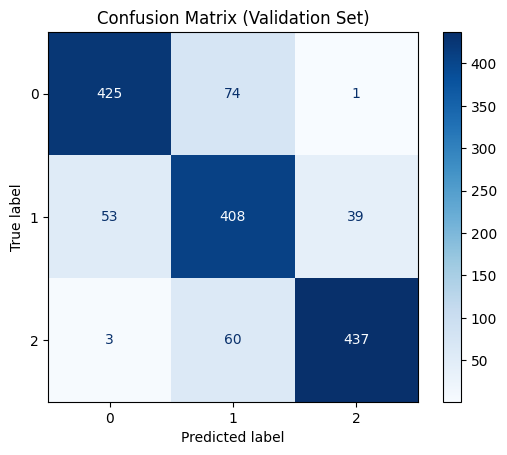


 [맞춘 데이터 예시]
문장: 옷소재가 넘 얇아서 지금입기 추울꺼같아서 아침저녁 운동용으로 입어요. 비추합니다.
정답: 부정, 예측: 부정
-----------------------
문장: 옷감이 뻔들거리는게있지만소매도길어요한단계내려서주문할껄ㅠㅠ
정답: 부정, 예측: 부정
-----------------------
문장: 아주 얇아요. 커터앤벅 이라고하기엔 소재가 좀 싼티나는 느낌이 있어요
정답: 부정, 예측: 부정
-----------------------
문장: 38사이즈 였다 살을뺐지만 그래도 넉넉히 입을라고 그냥 38샀는데 흘러내리려해서 벨트를 해야되네요. ㅡㅡ 색상이나 길이 모양 다 맘에 안듦
정답: 부정, 예측: 부정
-----------------------
문장: 착용전 세탁했는데 진청색 오른쪽 옆선이 뒤틀려서 입기 불편해졌습니다
정답: 부정, 예측: 부정
-----------------------

 [틀린 데이터 예시]
문장: 남편꺼랑 같이 주문햇는데요. 허리는 크고 바지통은 완죤 넓어서 반품햇어요.  그런데 여자꺼는 짱좋아요~ 남자꺼 사이즈가 아쉽네요~
정답: 부정, 예측: 중립
-----------------------
문장: 팔부분이 너무 딱 맞아서 반품하려고 하는데 부분반품이 안되네요. 제가 뚱뚱한편이 아닌데 도저히 못입겠어요.  아동용은 괜찮네요.
정답: 부정, 예측: 중립
-----------------------
문장: 생각보다  좀 무겁습니다. 사이즈도 좀 크게 나온 느낌이라  고민하다 겨울용이라 그냥 입기로 하긴했지만 평소 자기 사이즈보다 한사이즈 작게해도 무난하긴 할거 같네요.
정답: 부정, 예측: 중립
-----------------------
문장: 가죽 부들부들한데 신은 모습이 썩 예뻐보이지는 않아요 대신 편합니다 신었을때 핏이 예뻤다면 좋을텐데 너무 아쉽네요. 마트갈때나 신어야할듯.
정답: 부정, 예측: 중립
-----------------------
문장: 빠른 배송 만족합니다. 색깔이 예쁘네요. 이 색깔로 사이즈

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

# 1. 원본 텍스트 리스트
val_texts = tokenized_val["text"]

# 2. 예측
predictions = trainer_qlora.predict(tokenized_val)
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(axis=1)

# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# 4. 맞춘/틀린 인덱스
correct_indices = (y_true == y_pred)
wrong_indices = (y_true != y_pred)

# 5. 클래스 이름 매핑 (필요시 수정)
label_map = {0: "부정", 1: "중립", 2: "긍정"}

# 6. 맞춘 예시 출력
print("\n [맞춘 데이터 예시]")
for i in torch.where(torch.tensor(correct_indices))[0][:5]:
    print(f"문장: {val_texts[i]}")
    print(f"정답: {label_map[y_true[i]]}, 예측: {label_map[y_pred[i]]}")
    print("-----------------------")

# 7. 틀린 예시 출력
print("\n [틀린 데이터 예시]")
for i in torch.where(torch.tensor(wrong_indices))[0][:5]:
    print(f"문장: {val_texts[i]}")
    print(f"정답: {label_map[y_true[i]]}, 예측: {label_map[y_pred[i]]}")
    print("-----------------------")

## FT / LoRA / QLoRA 비교

| 학습 방식           | 1에폭당 학습 시간 | 최고 성능 도달 시간 | 최고 정확도 (Validation) | GPU 메모리 사용량 (Allocated)        | 파라미터 학습 범위                                  |
|--------------------|-------------------|----------------------|---------------------------|--------------------------------------|----------------------------------------------------|
| **Full Fine-Tuning** | 10분 26초         | 20분 52초            | 0.849333                  | 877.26MB → 1712.23MB (+835MB)        | 108,920,835 / 108,920,835<br>Trainable: **100%**     |
| **LoRA**           | 6분 11초          | 49분 31초            | 0.854667                  | 420.12MB → 446.02MB (+25.9MB)        | 1,181,955 / 110,102,790<br>Trainable: **1.07%**     |
| **QLoRA**          | 10분 00초         | 1시간 19분 56초      | 0.846667                  | 1955.08MB → 1955.20MB (+0.12MB)      | 1,181,955 / 110,102,790<br>Trainable: **1.07%**     |

In [ ]:
import os
def get_file_size_mb(path):
    size_bytes = os.path.getsize(path)
    return round(size_bytes / 1024 / 1024, 2)  # MB 단위

# 3개 모델 크기 확인
ft_size = get_file_size_mb("/content/results/checkpoint-11252/model.safetensors")
lora_size = get_file_size_mb("/content/results_lora/checkpoint-22504/adapter_model.safetensors")
qlora_size = get_file_size_mb("/content/results_beomi_qlora/checkpoint-22504/adapter_model.safetensors")

print(" 모델 저장 크기 :")
print(f"Full Fine-Tuning: {ft_size} MB")
print(f"LoRA:             {lora_size} MB")
print(f"QLoRA:            {qlora_size} MB")

 모델 저장 크기 :
Full Fine-Tuning: 415.52 MB
LoRA:             4.52 MB
QLoRA:            4.51 MB


- 1에폭당 학습시간
 - 우선 1 에폭당 걸리는 학습시간은 LoRA < QLoRA < FT
 - LoRA나 QLoRA의 경우 순전파에서 모델이 통과해야 하는 파라미터의 수가 더 많지만 역전파에서 소수의 파라미터만 업데이트가 되기 때문에 FT보다 더 적은 시간이 소요가 되었음
 - LoRA와 QLoRA의 학습 속도 차이가 나는 이유는 GPU가 float32/16와 같은 표준 부동소수점 연산에 최적화 되어있는 반면, QLoRA에서 사용하는 4bit 양자화 포맷(N4)는 bitsandbytes 라이브러리를 통해 처리되며, dequantization 등의 추가 연산 오버헤드가 발생하기 때문으로 추측

- 최고 성능 도달 시간
 - Full Fine-Tuning이 에폭당 학습 시간은 오래걸리나 학습하는 파라미터가 많아서 인지 2 epoch만에 최고 성능에 도달했음 / 결론적으로 최고 성능에 도달하기까지의 시간은 가장 적게 걸림
 - LoRA나 QLoRA의 경우 꾸준히 모델의 성능이 상승

- 최고 정확도
 - LoRA가 7에폭만에 FT의 최고 성능을 뛰어 넘음
 - 훨씬 적은 수의 파라미터를 업데이트 했음에도 충분히 FT의 성능이 나오고 오히려 그이상의 성능이 나올수도 있음을 확인

- GPU 메모리 증가량
 - FT(835MB) > LoRA(25.9MB) > QLoRA(0.12MB)
 - 전체 파라미터를 학습하는 FT의 경우가 모든 중간 연산값들을 저장해야 하기때문에 메모리 사용량이 급격히 증가
 - 일부 파라미터만 학습하는 LoRA나 QLoRA의 경우 GPU 메모리를 훨씬 적게 사용
 - 다만 QLoRA의 경우 4bit 양자화된 모델을 로딩하면서 초기부터 많은 메모리를 차지했음

- 모델 저장 크기
 - FT > LoRA > QLoRA
 - FT의 경우 전체 파라미터를 포함하므로 용량이 큼
 - LoRA / QLoRA 원본 모델은 고정이며 학습된 adapter만 따로 저장하므로 용량이 매우 작음


## 후기 및 회고
- 우선 batch_size에 따른 모델의 성능 변화를 다시 한번 확인 했음
- batch_size 32 -> 8 로 변경했을때 모델의 성능이 전체적으로 올라갔고 LoRA 모델이 FT 모델의 성능을 뛰어넘었음
- FT와 LoRA의 1 epoch당 학습시간이 생각보다 크게 차이 나지 않았음
- 학습할 파라미터의 수가 엄청 많이 차이나는것에 비해 1 epoch 학습 시간이 생각보단 큰 차이가 나지 않았는데 아마 순전파에서 1억개의 파라미터를 통과하며 값을 계산하는 과정에서 많은 시간이 소요되기 때문일거라 생각
- LoRA처럼 일부 adapter만 추가하여 해당 부분만 학습시키는 구조는 GPU 메모리 사용량 측면에서 매우 유리하다.
또한, 적절한 하이퍼파라미터 설정만 이루어진다면, FT 이상의 성능을 달성하는 것도 가능하다는 것을 실험을 통해 확인했다.
- QLoRA의 경우 학습이 되지않는 현상을 고치기 위해 많은 시간을 소요했는데 양자화 라는것이 생각보다 예민한 하이퍼파라미터 설정이 필요하다는 것을 느꼈음